**NetworkX** is a python based package to create, manipulate, structure study and dynamics of complex networks.

You can find a comprehensive documents [here](https://networkx.github.io/documentation/stable/tutorial.html).

In [1]:

import numpy as np
import pylab as plt
import networkx as nx

Basic graph types are python classes:

**Graph**: 
- provides an undirected graph. 
- Multiple edges between two nodes will be ignored.
- Self-loops are allowed.



In [2]:
G = nx.Graph()

### How to adding nodes/edges?

In [3]:
G = nx.Graph()
G.add_node(1)          
nlist = [0, 2, 3, 'b']          
G.add_nodes_from(nlist) 

In [4]:
list(G.nodes()) # Accessing nodes

[1, 0, 2, 3, 'b']

In [5]:
G.add_node("spam")

In [6]:
G.add_nodes_from("spam") 

In [7]:
G.remove_node(0)

In [8]:
G.add_edge(1, 2)   

e = (2, 'b')
G.add_edge(*e) 

elist = [(2, 3), (1, 3)]
G.add_edges_from(elist) 

In [9]:
list(G.edges()) # Accessing edges

[(1, 2), (1, 3), (2, 'b'), (2, 3)]

In [10]:
G.number_of_nodes()

9

In [11]:
G.number_of_edges()

4

In [12]:
G[1]

AtlasView({2: {}, 3: {}})

In [13]:
G[1][2]

{}

In [14]:
G[1][2]['w'] = 3

In [15]:
G[1][2]

{'w': 3}

In [16]:
G[1][2]['h'] = 3

In [17]:
G[1][2]

{'w': 3, 'h': 3}

In [18]:
G[1][3]['color']='blue'

In [19]:
for i,j in G.adjacency():
    print(i,j)

1 {2: {'w': 3, 'h': 3}, 3: {'color': 'blue'}}
2 {1: {'w': 3, 'h': 3}, 'b': {}, 3: {}}
3 {2: {}, 1: {'color': 'blue'}}
b {2: {}}
spam {}
s {}
p {}
a {}
m {}


/home/gf/packages/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


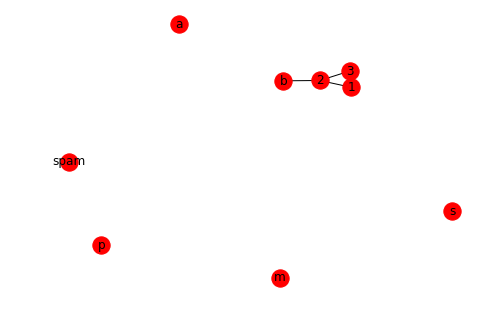

In [20]:
nx.draw(G, with_labels=True)

### Weighted

In [21]:
FG = nx.Graph()

In [22]:
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2 ,4 , 1.2), (3 ,4 , 0.375)])

In [23]:
for n,nbrs in FG.adjacency():
    for nbr,eattr in nbrs.items():
        print(nbr,eattr)

2 {'weight': 0.125}
3 {'weight': 0.75}
1 {'weight': 0.125}
4 {'weight': 1.2}
1 {'weight': 0.75}
4 {'weight': 0.375}
2 {'weight': 1.2}
3 {'weight': 0.375}


In [24]:
for n,nbrs in FG.adjacency():
    for nbr,eattr in nbrs.items():
        data = eattr['weight']
        print(data)

0.125
0.75
0.125
1.2
0.75
0.375
1.2
0.375


In [25]:
for n,nbrs in FG.adjacency():
    for nbr,eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5:
            print('(%d, %d, %.3f)' % (n, nbr, data))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [26]:
for (u, v, d) in FG.edges(data='weight'):
    if d < 0.5:
        print('(%d, %d, %.3f)'%(n, nbr, d))

(4, 3, 0.125)
(4, 3, 0.375)


### attributes

In [27]:
G = nx.Graph(day="Friday")

In [28]:
G.graph['day'] = 'Monday'

In [29]:
G.add_node(1, time='5pm')

In [30]:
G.add_nodes_from([3], time='2pm')

In [31]:
G.node[1]

{'time': '5pm'}

In [32]:
G.node[1]['room'] = 714

In [33]:
list(G.nodes(data=True))

[(1, {'time': '5pm', 'room': 714}), (3, {'time': '2pm'})]

In [34]:
G.add_edge(1, 2, weight=4.7)

In [35]:
G.add_edge(1, 2, weight=4.7)

In [36]:
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

In [37]:
G[1][2]['weight'] = 4.7

In [38]:
list(G.edges(data=True))

[(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 2, {'weight': 8})]

**DiGraph**: directed edges is supported. 

In [39]:
G = nx.DiGraph()

**MultiGraph**: Multiple undirected edges between pairs of nodes are allowed. 

In [40]:
G = nx.MultiGraph()

**MultiDiGraph**: As you can guess ...

In [41]:
G = nx.MultiDiGraph()

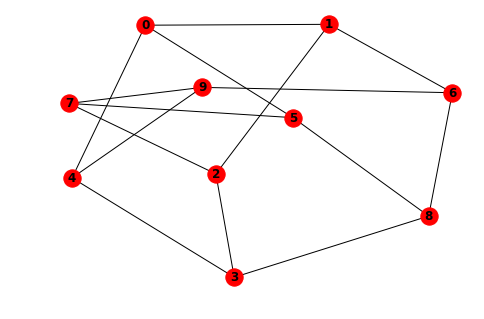

In [42]:
G = nx.petersen_graph()
nx.draw(G, with_labels=True, font_weight='bold')

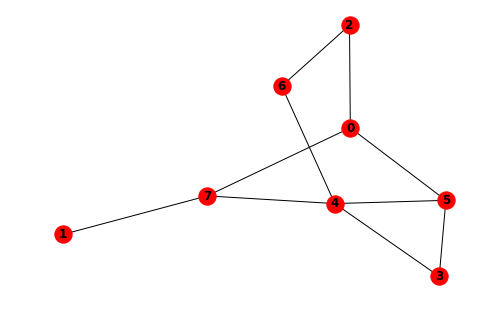

In [43]:
maze = nx.sedgewick_maze_graph()
nx.draw(maze, with_labels=True, font_weight='bold')

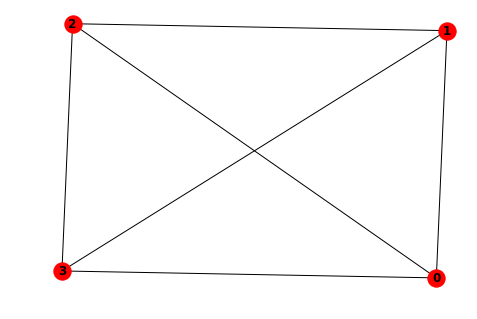

In [44]:
tet = nx.tetrahedral_graph()
nx.draw(tet, with_labels=True, font_weight='bold')

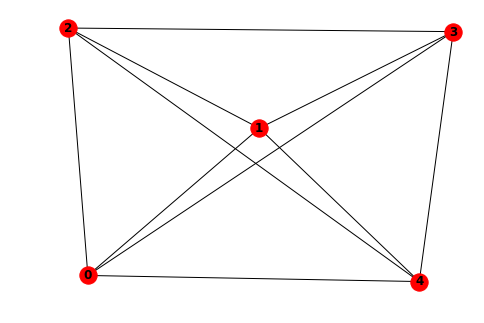

In [45]:
K_5 = nx.complete_graph(5)
nx.draw(K_5, with_labels=True, font_weight='bold')

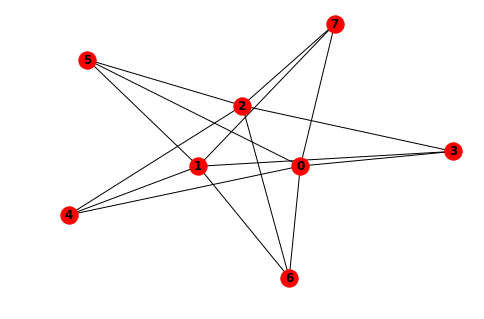

In [46]:
K_3_5 = nx.complete_bipartite_graph(3, 5)
nx.draw(K_3_5, with_labels=True, font_weight='bold')

## save/load

In [57]:
nx.write_gml(G, "graph.gml")

In [58]:
mygraph = nx.read_gml("graph.gml")

## Analyzing graphs

In [59]:
G=nx.Graph()

In [60]:
G.add_edges_from([(1, 2), (1, 3)])

In [61]:
G.add_node("spam")       # adds node "spam"

In [62]:
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [63]:
list(nx.degree(G))

[(1, 2), (2, 1), (3, 1), ('spam', 0)]

In [64]:
sorted(d for n, d in nx.degree(G))

[0, 1, 1, 2]

In [65]:
G = nx.lollipop_graph(4, 6)

In [66]:
pathlengths = []

# This prints the source node and the dictionary of shortest lengths to various nodes
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G, v)
    print('%s %s' % (v, spl))
    for p in spl.values():
        pathlengths.append(p)

print("average shortest path length %s" % (sum(pathlengths)/len(pathlengths)))

0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7}
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7}
2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7}
3 {3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6}
4 {4: 0, 5: 1, 3: 1, 6: 2, 0: 2, 1: 2, 2: 2, 7: 3, 8: 4, 9: 5}
5 {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 0: 3, 1: 3, 2: 3, 8: 3, 9: 4}
6 {6: 0, 5: 1, 7: 1, 4: 2, 8: 2, 3: 3, 9: 3, 0: 4, 1: 4, 2: 4}
7 {7: 0, 6: 1, 8: 1, 5: 2, 9: 2, 4: 3, 3: 4, 0: 5, 1: 5, 2: 5}
8 {8: 0, 7: 1, 9: 1, 6: 2, 5: 3, 4: 4, 3: 5, 0: 6, 1: 6, 2: 6}
9 {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 0: 7, 1: 7, 2: 7}
average shortest path length 2.86


In [67]:
# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p]+=1
    else:
        dist[p]=1
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print('%s %d' % (d,dist[d]))

length #paths
0 10
1 24
2 16
3 14
4 12
5 10
6 8
7 6


In [68]:
print("radius: %d" % nx.radius(G))
print("diameter: %d" % nx.diameter(G))
print("eccentricity: %s" % nx.eccentricity(G))
print("center: %s" % nx.center(G))
print("periphery: %s" % nx.periphery(G))
print("density: %s" % nx.density(G))

radius: 4
diameter: 7
eccentricity: {0: 7, 1: 7, 2: 7, 3: 6, 4: 5, 5: 4, 6: 4, 7: 5, 8: 6, 9: 7}
center: [5, 6]
periphery: [0, 1, 2, 9]
density: 0.26666666666666666


In [71]:
G = nx.grid_2d_graph(5,5)  # 5x5 grid
H = nx.grid_2d_graph(5,5)  # 5x5 grid

In [72]:
nx.is_isomorphic(G, H)

True

## Drawing

In [47]:
G = nx.grid_2d_graph(2,2)  #4x4 grid
pos = nx.spring_layout(G, iterations=100)

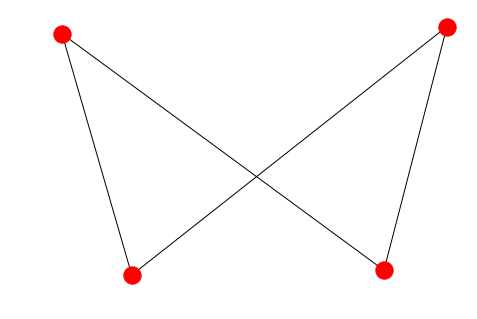

In [48]:
nx.draw(G)

In [49]:
G

In [50]:
G.nodes

NodeView(((0, 0), (0, 1), (1, 0), (1, 1)))

In [51]:
G.edges

EdgeView([((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 1), (1, 1)), ((1, 0), (1, 1))])

In [52]:
pos

{(0, 0): array([-0.9955303 , -0.89458753]),
 (0, 1): array([ 0.89625949, -1.        ]),
 (1, 0): array([-0.89885373,  0.99766881]),
 (1, 1): array([0.99812454, 0.89691872])}

In [53]:
nx.spring_layout?

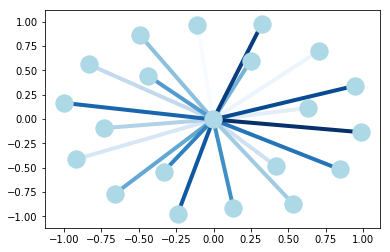

In [54]:
G = nx.star_graph(20)

pos = nx.spring_layout(G)

nx.draw_networkx(G, pos, node_color='lightblue', 
                 edge_color=range(20), 
                 width=4, 
                 edge_cmap=plt.cm.Blues, 
                 with_labels=False)

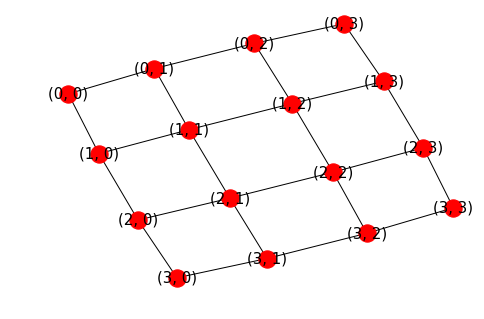

In [95]:
G = nx.grid_2d_graph(4,4)  #4x4 grid

pos = nx.spring_layout(G, iterations=100)

nx.draw(G, pos, with_labels=True, font_size=15)

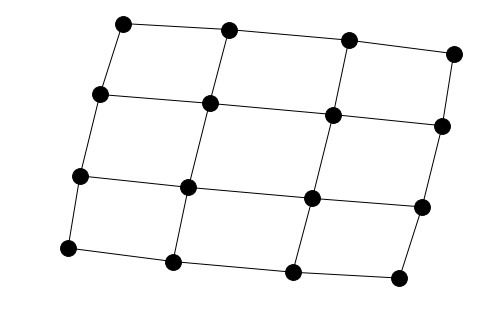

In [81]:
nx.draw(G, pos, node_color='k', node_size=250, with_labels=False)

In [55]:
import numpy as np

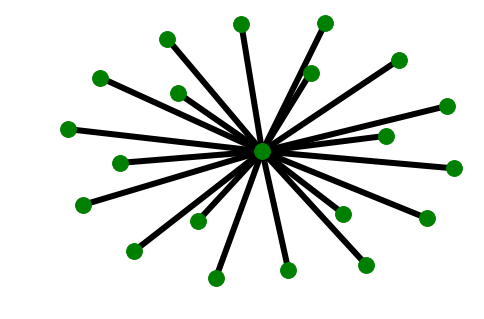

In [58]:
nx.draw(G, pos, node_color='g', node_size=250, with_labels=False, width=6)

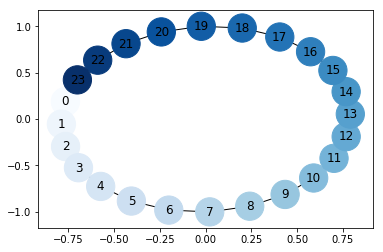

In [59]:
G = nx.cycle_graph(24)

pos = nx.spring_layout(G,iterations=200)

nx.draw_networkx(G, pos, node_color=range(24), node_size=800, cmap=plt.cm.Blues)

In [60]:
G = nx.random_tree(10)

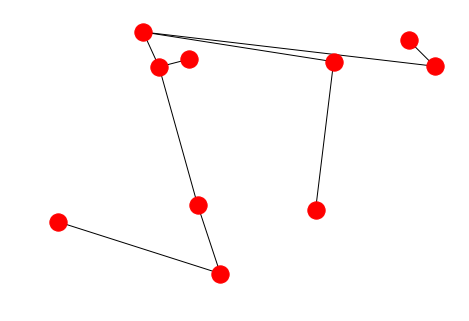

In [61]:
nx.draw_random(G)

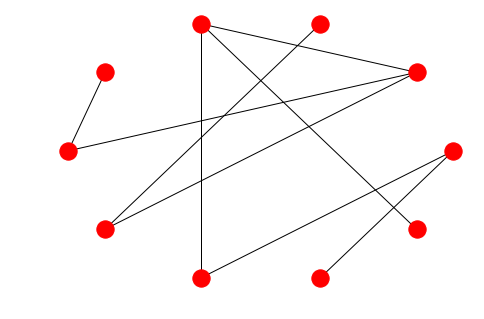

In [62]:
nx.draw_circular(G)

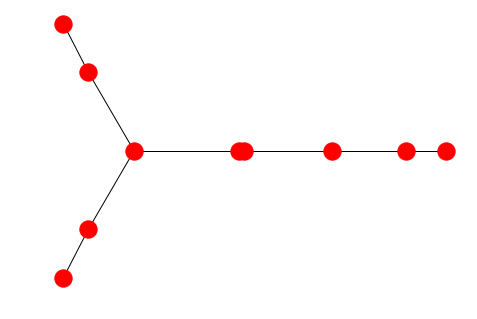

In [63]:
nx.draw_spectral(G)

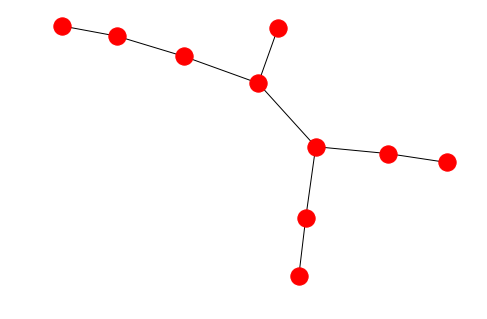

In [64]:
nx.draw_spring(G)